## Cameron Roehlk ABE 516X

#### This notebook can be found on GitHub under isu-abe/516x/croehlk named Roehlk-Linear Regression Assignment.ipynb

Task
1. Develop a suitable model using existing dissolved reactive Phosphorous (DRP)
2. Predict the missing DRP data using the model developed in Task 1

In [395]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [396]:
#Import water data from Ji Yeow
data = pd.read_excel("JY_linear_reg_data.xlsx", sheet_name = "Data")
data.head()
# There are some values where no data was collected that need to be removed.

,Sample date,Site,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L)
0,2015-05-19,S11,0.028210,0.018,0.0015,22.333667,19.264296
1,2015-06-16,S11,0.189993,0.027,0.1770,1006.666667,892.000000
2,2015-06-30,S11,1.296460,0.203,1.2590,1338.666667,1194.666667
3,2015-08-18,S11,0.131722,0.050,1.3280,2026.000000,1812.000000
4,2015-08-25,S11,0.120204,0.010,3.1180,1722.000000,1560.000000


In [397]:
#Drop the last three columns because they are not needed for this analysis
data = data.drop(columns=['TP (mg P/L)','TSS (mg/L)','VSS (mg/L)'])
data.head()

,Sample date,Site,Flow (cms),DRP (mg P/L)
0,2015-05-19,S11,0.028210,0.018
1,2015-06-16,S11,0.189993,0.027
2,2015-06-30,S11,1.296460,0.203
3,2015-08-18,S11,0.131722,0.050
4,2015-08-25,S11,0.120204,0.010


In [398]:
data = data.rename(columns={'Flow (cms)':'Flow', 'DRP (mg P/L)':'DRP'})

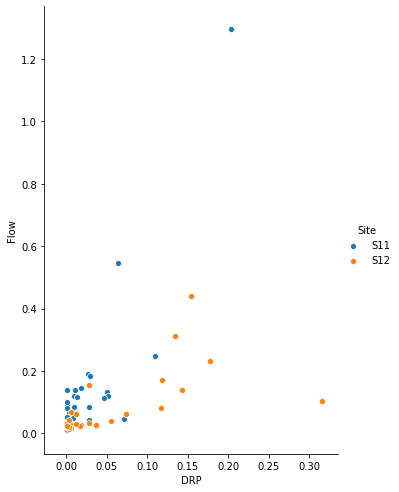

In [399]:
#Visualization of the data
sns.pairplot(data, x_vars=['DRP'], y_vars='Flow', hue = 'Site', height=7, aspect=0.7)

In [400]:
site11 = data[data['Site'] == "S11"]
site11

,Sample date,Site,Flow,DRP
0,2015-05-19,S11,0.028210,0.018
1,2015-06-16,S11,0.189993,0.027
2,2015-06-30,S11,1.296460,0.203
3,2015-08-18,S11,0.131722,0.050
4,2015-08-25,S11,0.120204,0.010
5,2015-09-01,S11,0.546236,0.064
6,2015-10-30,S11,0.037639,0.002
7,2015-10-30,S11,0.048967,0.008
8,2016-05-03,S11,0.249518,0.110
9,2016-05-17,S11,0.091356,0.001


In [401]:
site12 = data[data['Site'] == "S12"]
site12.head()

,Sample date,Site,Flow,DRP
29,2015-06-16,S12,0.102881,0.316
30,2015-07-21,S12,0.032054,0.028
31,2015-08-18,S12,0.040667,0.055
32,2015-08-25,S12,0.026085,0.003
33,2015-09-01,S12,0.172557,0.118


In [402]:
print(site11.isnull().sum())
print(site12.isnull().sum())

Sample date    0
Site           0
Flow           0
DRP            3
dtype: int64
Sample date    0
Site           0
Flow           0
DRP            4
dtype: int64


There are three null values for S11 and four null values for S12.

In [403]:
#Create new dataframes with just the null values
site11null = site11[site11.isnull().any(axis=1)]
site11null
site12null = site12[site12.isnull().any(axis=1)]
site12null

,Sample date,Site,Flow,DRP
59,2018-08-21,S12,0.128687,NaN
60,2018-08-31,S12,0.028923,NaN
61,2018-09-06,S12,0.024730,NaN
62,2018-09-26,S12,0.022594,NaN


In [404]:
site11new = site11.dropna(axis = 0, how ='any')
site11new.tail()

,Sample date,Site,Flow,DRP
23,2018-08-28,S11,0.139378,0.011
24,2018-09-11,S11,0.120500,0.052
25,2018-09-11,S11,0.115396,0.014
26,2018-09-26,S11,0.085015,0.010
27,2018-10-11,S11,0.113744,0.047


In [405]:
site12new = site12.dropna(axis = 0, how ='any')
site12new.tail()

,Sample date,Site,Flow,DRP
56,2018-06-20,S12,0.231406,0.177
57,2018-06-20,S12,0.311504,0.134
58,2018-07-02,S12,0.438978,0.154
63,2018-10-11,S12,0.024522,0.001
64,2018-10-11,S12,0.044039,0.003


In [406]:
s11_model = smf.ols(formula='DRP ~ Flow', data=site11new).fit()
print(s11_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    DRP   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     61.48
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           4.50e-08
Time:                        00:07:14   Log-Likelihood:                 61.156
No. Observations:                  26   AIC:                            -118.3
Df Residuals:                      24   BIC:                            -115.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0068      0.006      1.199      0.2

The site 11 data set has a relatively high R-squared value. However, the P-vale for the intercept is well above 5% meaning it is not statistically significant.

In [407]:
s12_model = smf.ols(formula='DRP ~ Flow', data=site12new).fit()
print(s12_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    DRP   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     21.10
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           7.32e-05
Time:                        00:07:15   Log-Likelihood:                 47.461
No. Observations:                  32   AIC:                            -90.92
Df Residuals:                      30   BIC:                            -87.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0116      0.013      0.918      0.3

Site 12 has a low R-squared value but it is statistically significant as the p-value is under 5%.

In [408]:
#Predict the missing values into a new dataframe for site 11
prediction11 = pd.DataFrame(columns=list('DRP ~ Flow'))
predictnull_data11 = s11_model.predict(site11null['Flow'])
prediction11.loc[:,'DRP ~ Flow'] = predictnull_data11
prediction11.drop(prediction11.columns[0:10], axis=1, inplace=True) 
prediction11 


,DRP ~ Flow
21,0.022142
22,0.034885
28,0.030057


In [409]:
prediction11 = prediction11.rename(columns={'DRP ~ Flow': 'DRP'})
prediction11 ['Flow'] = site11null ['Flow']
prediction11 ['Sample date'] = site11null ['Sample date']
prediction11 ['Site'] = 'S11'
prediction11

,DRP,Flow,Sample date,Site
21,0.022142,0.103414,2018-06-22,S11
22,0.034885,0.189099,2018-06-27,S11
28,0.030057,0.156634,2018-10-11,S11


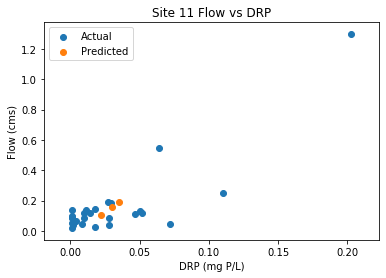

In [410]:
plt.scatter(site11['DRP'], site11['Flow'], label = 'Actual')
plt.scatter(prediction11['DRP'], prediction11['Flow'], label='Predicted')
plt.title("Site 11 Flow vs DRP")
plt.xlabel("DRP (mg P/L)")
plt.ylabel("Flow (cms)")
plt.legend()
plt.show()

In [411]:
#Merge the site 11 null values with the predicted values
merged_data11 = pd.concat([site11new, prediction11], sort=True)
merged_data11 = merged_data11.sort_values(by=['Sample date'])
print(merged_data11.isnull().sum())

DRP            0
Flow           0
Sample date    0
Site           0
dtype: int64


In [412]:
#Predict the missing values into a new dataframe for site 12
prediction12 = pd.DataFrame(columns=list('DRP ~ Flow'))
predictnull_data12 = s12_model.predict(site12null['Flow'])
prediction12.loc[:,'DRP ~ Flow'] = predictnull_data12
prediction12.drop(prediction12.columns[0:10], axis=1, inplace=True) 

prediction12 ['Flow'] = site12null ['Flow']
prediction12 ['Sample date'] = site12null ['Sample date']
prediction12 ['Site'] = 'S12'
prediction12 = prediction12.rename(columns={'DRP ~ Flow': 'DRP'})
prediction12

,DRP,Flow,Sample date,Site
59,0.073823,0.128687,2018-08-21,S12
60,0.025572,0.028923,2018-08-31,S12
61,0.023544,0.024730,2018-09-06,S12
62,0.022511,0.022594,2018-09-26,S12


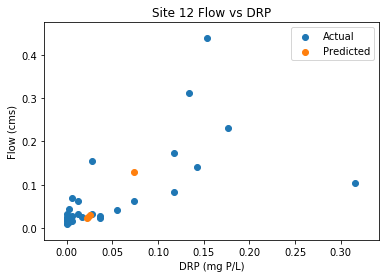

In [413]:
plt.scatter(site12['DRP'], site12['Flow'], label = 'Actual')
plt.scatter(prediction12['DRP'], prediction12['Flow'], label='Predicted')
plt.title("Site 12 Flow vs DRP")
plt.xlabel("DRP (mg P/L)")
plt.ylabel("Flow (cms)")
plt.legend()
plt.show()

In [414]:
#Merge the site 12 null values with the predicted values
merged_data12 = pd.concat([site12new, prediction12], sort=True)
merged_data12 = merged_data12.sort_values(by=['Sample date'])
print(merged_data12.isnull().sum())

DRP            0
Flow           0
Sample date    0
Site           0
dtype: int64


In [415]:
#Now merge the mereged data from the two sites into a single data frame
Finaldata = pd.concat([merged_data11,merged_data12])
print(Finaldata.isnull().sum())


DRP            0
Flow           0
Sample date    0
Site           0
dtype: int64
